[Back to Module 5](module5.ipynb)

# Module 6: SAN Configuration

## Excercise 1: Writing a Python Program to configure a LUN and Map it to a host  

In this exercise, you write a Python program by using the Python client library (PCL) and use NetApp ONTAP REST APIs to demonstrate some SAN ONTAP REST API calls.


### Objectives

This exercise focuses on enabling you to do the following:  

- Write a Python program to create a LUN by using ONTAP REST APIs  
- Create an initiator group (igroup)  
- Map the LUN to the igroup  

---

### Task 1 Setup the Environment in the cluster to practice writing a Python Script to Create a LUN, iGroup and map them.

You need to setup the cluster as a prerequisite to run the Python program. 

- Step 1  
  From the Ontap CLI, create an SVM

  The command to do this:  

  ---

  ```
  vserver create -vserver san_svm -aggregate aggr1_cluster1_01_data -data-services data-iscsi  
  ```
  ---

- Step 2 

  Create a volume of 1GB to hold the LUN in this SVM

  From the Ontap CLI, the command to do this:  

  ---

  ```
  volume create -vserver san_svm -volume san_vol -aggregate aggr1_cluster1_01_data -size 1GB 
  ```
  ---
- Step 3  

  ---

  Create LIF on each of the 2 nodes

  ```
  network interface create -vserver san_svm -lif lif_san1 -service-policy default-data-iscsi -address 192.168.0.241 -netmask 255.255.255.0 -home-node cluster1-01 -home-port e0d -status-admin up 

  network interface create -vserver san_svm -lif lif_san2 -service-policy default-data-iscsi -address 192.168.0.242 -netmask 255.255.255.0 -home-node cluster1-02 -home-port e0d -status-admin up
  ```

  ---
  
- Step 3  

  Enable iSCSI services on the SVM:  

  ---

  ```
  vserver iscsi create -vserver san_svm
  ```
  ---

You can run these commands by opening a terminal and running the commands using ssh. 

You can copy the commands from the cell above.

---


To open a terminal, use ``` CTRL+` ```. then login to the cluster by running `ssh admin@cluster1`

You can also execute these commands using the Jupyter notebook code by clicking on the [link](module6_setup.ipynb) below.  

Once the new notebook opens, you can run the cell.  

If prompted to `select the kernel`, please select `.venv(Python 3.9.6)`  

Verify that the commands run successfully, then return to this notebook.

[module6_setup](module6_setup.ipynb)  

---

### Task 2: Examine the documentation for the Python Client Library and REST API for LUN, iGroup, LUNMap  
**Step 1:**
  
Review the documentation for `Python Client Library` Ontap resources:

[Module **netapp_ontap.resources**](https://library.netapp.com/ecmdocs/ECMLP2885777/html/resources/index.html)

and specifically:

[Module **netapp_ontap.resources.lun**](https://library.netapp.com/ecmdocs/ECMLP3319064/html/resources/lun.html)  

[Module **netapp_ontap.resources.igroup**](https://library.netapp.com/ecmdocs/ECMLP3319064/html/resources/igroup.html)

[Module **netapp_ontap.resources.lun_map**](https://library.netapp.com/ecmdocs/ECMLP3319064/html/resources/lun_map.html)


The documentation provides example code on how to do various operations with LUN configurations. 
This documentation is generated based on ONTAP REST API documentation.

---

**Step 2:**

Review the documentation for `ONTAP REST API`

We can open the `ONTAP REST API` online document by going to the following URL:

[https://192.168.0.101/docs/api](https://192.168.0.101/docs/api)

On the VS Code dialog box, Click `Open` to open the external website in a browser. If you get a warning about an untrusted site, Click on advanced and Proceed to the website.

You will need to login to the documentation page, use `admin` with a password `Netapp1!`                  

In the browser, you can search in the page (`CTRL+F`) for `storage/luns`.  

Reveiw the [**DOC** /storage/luns](https://192.168.0.101/docs/api/#/docs/SAN/storage_luns) and [**POST** /storage/luns](hhttps://192.168.0.101/docs/api/#/SAN/lun_create)

One of the preceding two links gives you a good example of a cURL command to create the LUN, including details about the JSON data that you want to pass to create a LUN  

---

```JSON
{
"name": "/vol/san_vol/lun1",
"svm.name": "san_svm",
"aggregates": "aggr1",
"space": "50 MB",
"os_type": "linux"
}
```

---

Write the `create_lun()` function and pass input parameters to the function, which are the command-line arguments that are processed by the parse_args() function.

Build a data structure shown above within the `create_lun()` function and then issue the POST method on the data to create a lun.

---

Also, review the documentation for `igroups`  
Search for `/protocols/san/igroups`

[**DOC** /protocols/san/igroups](https://192.168.0.101/docs/api/#/docs/SAN/protocols_san_igroups) and [**POST** /protocols/san/igroups](https://192.168.0.101/docs/api/#/SAN/igroup_create)

To create a igroup, look for a good example of the POST method that has details about the JSON data that you want to pass to create an igroup.

---

```JSON
{
"name": "igroup1",
"svm.name": "san_svm",
"protocol": "iscsi",
"os_type": "linux"
}

```
---

Write the `create_igroup()` function and pass input parameters to the function, which are the command-line arguments that are processed by the `parse_args()` function.

Build a data structure (similar to the one shown above) within the `create_igroup()` function and then issue the POST method on the data to create an igroup.

---

Review the documentation for `lun-maps`  
Search for `/protocols/san/lun-maps`


[**DOC** /protocols/san/lun-maps](https://192.168.0.101/docs/api/#/docs/SAN/protocols_san_lun-maps) and [**POST** /protocols/san/lun-maps](https://192.168.0.101/docs/api/#/SAN/lun_map_create)

One of the preceding two links provides a good example of a cURL command to setup a LUN Mapping, including details about the JSON data that you want to pass to create a LUN Mapping.

---

```JSON
{
"svm.name": "san_svm",
"igroup": "igroup1",
"lun": "/vol/san_vol/lun1"
}
```

---

Write the `map_lun_igroup()` function and pass input parameters to the function, which are the command-line arguments that are processed by the `parse_args()` function.

Build a data structure (similar to the one shown above) within the `map_lun_igroup()` function and then issue the POST method on the data to create the LUN mapping configuration.

---

### Task 3 Write Python code to Create a LUN, an igroup and Map the LUN to the igroup

Write a Python program `san_lun.py` that uses PCL to do the following:
  - Create a LUN: /vol/san_vol/lun1
  - Create an igroup: igroup1
  - Map the LUN to the igroup.

The main() function calls the following functions:
  - parse_args()
  - create_lun()
  - create_igroup()
  - map_lun_igroup()  

---  

```
Usage: python san_lun.py [-h] -c CLUSTER -vs VSERVER_NAME, -l LUN_NAME -ig IGROUP_NAME
       [-u API_USER] [-p API_PASS]

The following arguments are required:-c/--cluster, -vs/--vserver_name, -l/--lun_name, -ig/--igroup_name       
```
---

The program should have the following sections:
  - An `Header Comment`:
      
      This section usually includes details such as the file name, author, date, purpose of the program, and any other relevant information. 
      
      It"s a good practice to include such comments for better readability and maintainability of the code

  - An `Import` Section:
      This contains the list of libraries/modules that need to be called in the program
  - The `Function` definitions
  - The `Command Line Arguments Parsing` Section
  - The `Main` Section  

  ---

You can start from scratch and create a python script called [san_lun.py](../san_lun.py)  
To get help with the structure of the script, you can review [create_san.py](../create_san.py)

---
**OR**  

Follow the guided Jupyter Notebook example [module6_code.ipynb](module6_code.ipynb).

If prompted to select the kernel, select `.venv(Python3.9.6)`  

---



### Task 4: Run and Verify that a LUN, iGroup and LUN mapping were created  

If you created the python file [san_lun.py](../san_lun.py), you can save the file using `CTRL + S` and open a terminal using ```CTRL + ` ``` and run:

---
```
python san_lun.py -c cluster1 -vs san_svm -l /vol/san_vol/lun1 -ig igroup1 -u admin -p Netapp1!
```
---

---

To verify that a LUN, iGroup and LUN mapping were created:

Use [this](module6_verify.ipynb) Jupyter Notebook to run the code:

[module6_verify.ipynb](module6_verify.ipynb)

If prompted to select the kernel, select `.venv(Python3.9.6)`  

---

 **OR**

Go to the ONTAP CLI session and run the following commands:

---
```
cluster1::> lun show
cluster1::> lun igroup show
cluster1::> lun mapping show
```
---

You can open a Terminal using ```CTRL+` ```, then open an ssh session using `ssh admin@cluster1`


---

On your Windows `Jumphost`, do the following:  
  - Open `Server Manger>Tools>ISCSI Initiator`
  - In the Targets tab, enter 192.168.0.241 (one of the iSCSI LIF IP addresses) in theTarget field.
  - Click `Quick Connect`
  
    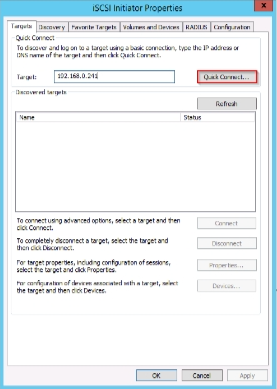  

  - Verify that the target is connected and then click `Done` in the `Quick Connect` window  

  ---
  
  - Open `Server Manager>Tools>Computer Management`  

  - Right Click `Disk Management` and select `Rescan Disks`

  - If the LUN has been mapped correctly, it should appear in the disk list

  ---
  - Prepare the LUN for use, by bringing it `Online`
  
  -  Create a Simple Volume and assign it a drive letter.
  
  ---

  - Try writing a file to the Drive. 

  ---

[Go to Module 7](module7.ipynb)